In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#Data and Problem description: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

# import the training and test dataset
df = pd.read_excel('default of credit card clients.xls')

df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [2]:
#housekeeping 

df = df.drop(['Unnamed: 0'], axis=1) 
df = df.drop(0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# Basics 

df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

In [5]:
#Check missing data 

def checkNans(df):
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:8]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    return missing_data

checkNans(df)

# No missing numbers

,Missing Ratio


In [6]:
# Check for duplicate rows

# calculate and report duplicates
dups = df.duplicated()
print(df[dups])

           X1 X2 X3 X4  X5  X6  X7  X8  X9 X10  ...   X15   X16   X17   X18  \
1981   150000  2  1  1  38   1  -2  -2  -2  -2  ...     0     0     0     0   
4586   150000  2  1  1  31   1  -2  -2  -2  -2  ...     0     0     0     0   
6023   210000  2  1  2  39   1  -2  -2  -2  -2  ...     0     0     0     0   
6467   210000  2  2  1  49   1  -2  -2  -2  -2  ...     0     0     0     0   
7320   500000  1  1  1  43   1  -2  -2  -2  -2  ...     0     0     0     0   
8321   360000  1  2  1  41   1  -2  -2  -2  -2  ...     0     0     0     0   
10251   50000  1  2  2  26   1  -2  -2  -2  -2  ...     0     0     0     0   
13107  360000  2  1  1  49   1  -2  -2  -2  -2  ...     0     0     0     0   
14295   20000  1  2  2  24   2   2   4   4   4  ...  1650  1650  1650     0   
15459  160000  1  2  2  28  -2  -2  -2  -2  -2  ...     0     0     0     0   
15618  200000  2  2  2  26  -2  -2  -2  -2  -2  ...     0     0     0     0   
15686  360000  1  1  2  29   1  -2  -2  -2  -2  ... 

In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(29965, 24)


In [8]:
# Check for duplicate columns 

# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

[]


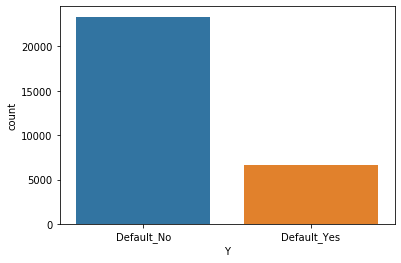

In [9]:
import seaborn as sns

# Visualize the dependent variable 
g = sns.countplot(df['Y'])
g.set_xticklabels(['Default_No','Default_Yes'])
plt.show()

In [10]:
df


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [11]:
# Imbalance data problem is not severe, but will be checked further....

# class_weight='balanced' will be used in classifiers to make sure that classes are assigned weights in the 
# loss function proportional to inverse of their frequency in data. This will help with the recall. 

# Lets reorganize the columns -- First the target, then numerical columns and lastly the categorical variables.

cols = list(df)
cols.insert(0, cols.pop(cols.index('Y')))
cols.insert(len(cols), cols.pop(cols.index('X1')))
cols.insert(len(cols), cols.pop(cols.index('X5')))
df = df.loc[:, cols]
df


,Y,X2,X3,X4,X6,X7,X8,X9,X10,X11,...,X16,X17,X18,X19,X20,X21,X22,X23,X1,X5
1,1,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,689,0,0,0,0,20000,24
2,1,2,2,2,-1,2,0,0,0,2,...,3455,3261,0,1000,1000,1000,0,2000,120000,26
3,0,2,2,2,0,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,90000,34
4,0,2,2,1,0,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,50000,37
5,0,1,2,1,-1,0,-1,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,50000,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,1,3,1,0,0,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,220000,39
29997,0,1,3,2,-1,-1,-1,-1,0,0,...,5190,0,1837,3526,8998,129,0,0,150000,43
29998,1,1,2,2,4,3,2,-1,0,0,...,20582,19357,0,0,22000,4200,2000,3100,30000,37
29999,1,1,3,1,1,-1,0,0,0,-1,...,11855,48944,85900,3409,1178,1926,52964,1804,80000,41


In [12]:
# Define categorical variables for lgbm's use: 
for i in range(0,10):
    df.iloc[:,i] = pd.Series(df.iloc[:,i], dtype="category")
for i in range(10,24):
    df.iloc[:,i] = pd.Series(df.iloc[:,i], dtype="float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Y       29965 non-null  category
 1   X2      29965 non-null  category
 2   X3      29965 non-null  category
 3   X4      29965 non-null  category
 4   X6      29965 non-null  category
 5   X7      29965 non-null  category
 6   X8      29965 non-null  category
 7   X9      29965 non-null  category
 8   X10     29965 non-null  category
 9   X11     29965 non-null  category
 10  X12     29965 non-null  float64 
 11  X13     29965 non-null  float64 
 12  X14     29965 non-null  float64 
 13  X15     29965 non-null  float64 
 14  X16     29965 non-null  float64 
 15  X17     29965 non-null  float64 
 16  X18     29965 non-null  float64 
 17  X19     29965 non-null  float64 
 18  X20     29965 non-null  float64 
 19  X21     29965 non-null  float64 
 20  X22     29965 non-null  float64 
 21  X23     2996

In [13]:
from sklearn import preprocessing
# Standardize numerical variables 

df.iloc[:,10:] = preprocessing.scale(df.iloc[:,10:])
df

,Y,X2,X3,X4,X6,X7,X8,X9,X10,X11,...,X16,X17,X18,X19,X20,X21,X22,X23,X1,X5
1,1,2,2,1,2,2,-1,-1,-2,-2,...,-0.663612,-0.653264,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562,-1.136285,-1.246078
2,1,2,2,2,-1,2,0,0,0,2,...,-0.606802,-0.598525,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119,-0.365619,-1.029141
3,0,2,2,2,0,0,0,0,0,0,...,-0.417822,-0.392257,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453,-0.596819,-0.161397
4,0,2,2,1,0,0,0,0,0,0,...,-0.187439,-0.157286,-0.221470,-0.169565,-0.228864,-0.238074,-0.244398,-0.237340,-0.905085,0.164007
5,0,1,2,1,-1,0,-1,0,0,0,...,-0.348795,-0.332130,-0.221470,1.334009,0.270680,0.265939,-0.269257,-0.255388,-0.905085,2.333368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,1,3,1,0,0,0,0,0,0,...,-0.149982,-0.385023,0.170768,0.610418,-0.012982,-0.113857,0.012763,-0.237340,0.405046,0.380943
29997,0,1,3,2,-1,-1,-1,-1,0,0,...,-0.578273,-0.653264,-0.231306,-0.104194,0.213800,-0.300023,-0.314331,-0.293562,-0.134420,0.814815
29998,1,1,2,2,4,3,2,-1,0,0,...,-0.325182,-0.328336,-0.342158,-0.257145,0.951876,-0.040297,-0.183493,-0.119275,-1.059218,0.164007
29999,1,1,3,1,1,-1,0,0,0,-1,...,-0.468681,0.168314,4.841417,-0.109269,-0.230113,-0.185376,3.150512,-0.192138,-0.673885,0.597879


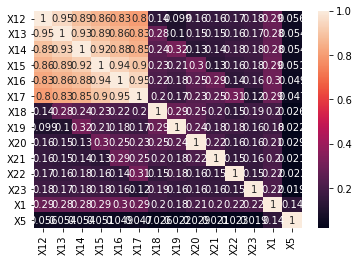

In [14]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Amount of bill statement variables are highly correlated! Maybe keeping only one of them would do the trick. This will be evaluated. 

In [15]:
# Create train and test Data 
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
Y = df.iloc[:,0]

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)




In [16]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn import linear_model
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot



In [21]:
# Stacking ensemble models 

def stacking():
    # base models
    level0 = list()
    level0.append(('logr', LogisticRegression(class_weight='balanced')))
    level0.append(('cart', DecisionTreeClassifier(class_weight='balanced')))
    level0.append(('bayes', GaussianNB()))
    level0.append(('lgb', lgb.LGBMClassifier(class_weight='balanced')))
    #  meta learner 
    level1 = LogisticRegression()
    # define the stacking ensemble, 5 fold cross validation
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

def voting():
    level0 = list()
    level0.append(('logr', LogisticRegression(class_weight='balanced')))
    level0.append(('cart', DecisionTreeClassifier(class_weight='balanced')))
    level0.append(('bayes', GaussianNB()))
    level0.append(('lgb', lgb.LGBMClassifier(class_weight='balanced')))
    model = VotingClassifier(estimators=level0,voting='soft')
    return model

# models to evaluate
def model_list():
    models = {}
    models['logr'] = LogisticRegression(class_weight='balanced')
    models['cart'] = DecisionTreeClassifier(class_weight='balanced')
    models['bayes'] = GaussianNB()
    models['lgb'] = lgb.LGBMClassifier(class_weight='balanced')
    #models['rf'] = RandomForestClassifier(class_weight='balanced')
    models['stacking'] = stacking()
    models['voting'] = voting()
    return models
 
# Evaluate via cross-validation
def evaluate(model, X, Y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=12345)
    scores={}
    scores['accuracyscores']= cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    scores['f1scores'] = cross_val_score(model, X, Y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    scores['roc_aucscores'] = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    scores['precision'] = cross_val_score(model, X, Y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    scores['recall'] = cross_val_score(model, X, Y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    return scores
# evaluate the models and store results
# We evaluate models base don accuracy, f1 score, area under the ROC curve, precision and recall. 

# CM 
                #Predicted
    #           0       1
# Actual   0    TN      FP
#          1    FN      TP
# Recall ==> TP/(TP+FN)
# Precision ==> TP/(TP+FP)
def compare(models,X,Y):
    summaryRes = pd.DataFrame(columns = ['Score Type','Model Name','Mean','STD'])
    counter=0
    accresults,f1results,aucresults, precisionresults, recallresults, names = list(), list(),list(), list(), list(), list()
    for name, model in models.items():
        scores = evaluate(model, X, Y)
        
        accresults.append(scores['accuracyscores'])
        print('accuracy')
        print('>%s %.3f (%.3f)' % (name, mean(scores['accuracyscores']), std(scores['accuracyscores'])))
        summaryRes.loc[counter]=(['Accuracy']+[name]+[mean(scores['accuracyscores'])]+[std(scores['accuracyscores'])])
        counter=counter+1
                                                                                      
        f1results.append(scores['f1scores'])
        print('f1')
        print('>%s %.3f (%.3f)' % (name, mean(scores['f1scores']), std(scores['f1scores'])))
        summaryRes.loc[counter]=(['f1scores']+[name]+[mean(scores['f1scores'])]+[std(scores['f1scores'])])
        counter=counter+1                                                                              
        
        aucresults.append(scores['roc_aucscores'])
        print('roc_auc')
        print('>%s %.3f (%.3f)' % (name, mean(scores['roc_aucscores']), std(scores['roc_aucscores'])))
        summaryRes.loc[counter]=(['roc_aucscores']+[name]+[mean(scores['roc_aucscores'])]+[std(scores['roc_aucscores'])])
        counter=counter+1 
                                                                                
        precisionresults.append(scores['precision'])
        print('precision')
        print('>%s %.3f (%.3f)' % (name, mean(scores['precision']), std(scores['precision'])))
        summaryRes.loc[counter]=(['precision']+[name]+[mean(scores['precision'])]+[std(scores['precision'])])
        counter=counter+1 
        
        recallresults.append(scores['recall'])
        print('recall')
        print('>%s %.3f (%.3f)' % (name, mean(scores['recall']), std(scores['recall'])))
        summaryRes.loc[counter]=(['recall']+[name]+[mean(scores['recall'])]+[std(scores['recall'])])
        counter=counter+1                                                                        
        
        names.append(name)

    # plot model accuracy performance for comparison
    pyplot.boxplot(accresults, labels=names, showmeans=True)
    pyplot.ylabel("Accuracy")
    pyplot.show()

    # plot model f1 performance for comparison
    pyplot.boxplot(f1results, labels=names, showmeans=True)
    pyplot.ylabel("f1score")
    pyplot.show()

    # plot model roc_auc performance for comparison
    pyplot.boxplot(aucresults, labels=names, showmeans=True)
    pyplot.ylabel("roc_aucscore")
    pyplot.show()
    
     # plot model precision performance for comparison
    pyplot.boxplot(precisionresults, labels=names, showmeans=True)
    pyplot.ylabel("precision")
    pyplot.show()
    
    # plot model recall performance for comparison
    pyplot.boxplot(recallresults, labels=names, showmeans=True)
    pyplot.ylabel("recall")
    pyplot.show()
    
    return summaryRes

accuracy
>logr 0.689 (0.006)
f1
>logr 0.478 (0.007)
roc_auc
>logr 0.723 (0.008)
precision
>logr 0.380 (0.007)
recall
>logr 0.642 (0.013)
accuracy
>cart 0.732 (0.005)
f1
>cart 0.395 (0.011)
roc_auc
>cart 0.611 (0.006)
precision
>cart 0.395 (0.010)
recall
>cart 0.396 (0.014)
accuracy
>bayes 0.703 (0.043)
f1
>bayes 0.496 (0.020)
roc_auc
>bayes 0.737 (0.009)
precision
>bayes 0.403 (0.039)
recall
>bayes 0.656 (0.046)
accuracy
>lgb 0.762 (0.005)
f1
>lgb 0.537 (0.009)
roc_auc
>lgb 0.780 (0.008)
precision
>lgb 0.471 (0.009)
recall
>lgb 0.624 (0.015)
accuracy
>stacking 0.820 (0.004)
f1
>stacking 0.490 (0.011)
roc_auc
>stacking 0.780 (0.008)
precision
>stacking 0.659 (0.016)
recall
>stacking 0.390 (0.012)
accuracy
>voting 0.761 (0.006)
f1
>voting 0.515 (0.010)
roc_auc
>voting 0.755 (0.008)
precision
>voting 0.468 (0.010)
recall
>voting 0.573 (0.016)


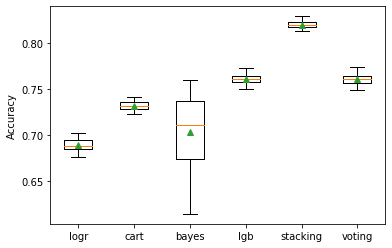

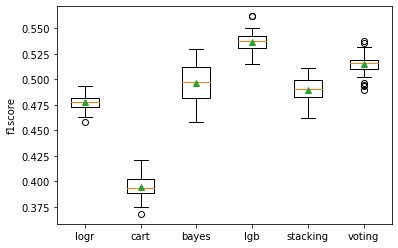

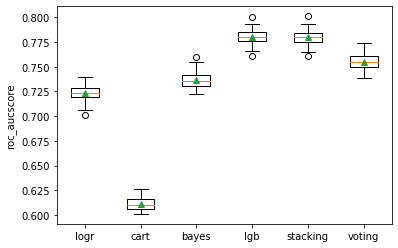

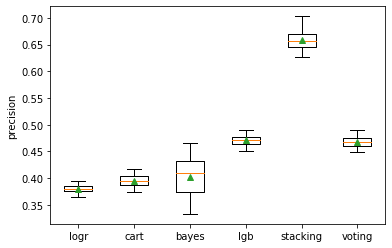

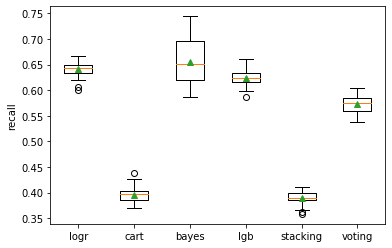

,Score Type,Model Name,Mean,STD
0,Accuracy,logr,0.689358,0.006474
1,f1scores,logr,0.477507,0.007162
2,roc_aucscores,logr,0.723397,0.007503
3,precision,logr,0.380359,0.006785
4,recall,logr,0.641538,0.013279
5,Accuracy,cart,0.732264,0.004542
6,f1scores,cart,0.394657,0.010656
7,roc_aucscores,cart,0.611274,0.006394
8,precision,cart,0.395362,0.009985
9,recall,cart,0.395716,0.013771


In [22]:
models = model_list()
resultSummary=compare(models,X,Y)
resultSummary.to_excel("summary.xlsx")  
resultSummary

In [23]:
# Looks like lightRGB is the champion. No need to run stacking or voting ensemble since there is no significant contributions of them.
# LGBM's recall is the second highest (after bayes) but its other kpi s are much better than the bayes and others, 
# Recall that the bank would love to have a classifier with high accuracy and high recall ratio (being able to classify the default loans)

# Lets see the impacts of correlations, racall that x12-x17 are highly correlated. 
# Lets keep only x12 and drop x13-x17. 

df2 = df.drop(['X13','X14','X15','X16','X17'], axis=1) 
df2

,Y,X2,X3,X4,X6,X7,X8,X9,X10,X11,X12,X18,X19,X20,X21,X22,X23,X1,X5
1,1,2,2,1,2,2,-1,-1,-2,-2,-0.643117,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562,-1.136285,-1.246078
2,1,2,2,2,-1,2,0,0,0,2,-0.659830,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119,-0.365619,-1.029141
3,0,2,2,2,0,0,0,0,0,0,-0.299280,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453,-0.596819,-0.161397
4,0,2,2,1,0,0,0,0,0,0,-0.058284,-0.221470,-0.169565,-0.228864,-0.238074,-0.244398,-0.237340,-0.905085,0.164007
5,0,1,2,1,-1,0,-1,0,0,0,-0.579253,-0.221470,1.334009,0.270680,0.265939,-0.269257,-0.255388,-0.905085,2.333368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,1,3,1,0,0,0,0,0,0,1.869003,0.170768,0.610418,-0.012982,-0.113857,0.012763,-0.237340,0.405046,0.380943
29997,0,1,3,2,-1,-1,-1,-1,0,0,-0.673393,-0.231306,-0.104194,0.213800,-0.300023,-0.314331,-0.293562,-0.134420,0.814815
29998,1,1,2,2,4,3,2,-1,0,0,-0.647842,-0.342158,-0.257145,0.951876,-0.040297,-0.183493,-0.119275,-1.059218,0.164007
29999,1,1,3,1,1,-1,0,0,0,-1,-0.718575,4.841417,-0.109269,-0.230113,-0.185376,3.150512,-0.192138,-0.673885,0.597879


accuracy
>logr 0.691 (0.006)
f1
>logr 0.479 (0.007)
roc_auc
>logr 0.723 (0.008)
precision
>logr 0.382 (0.007)
recall
>logr 0.641 (0.013)
accuracy
>cart 0.730 (0.005)
f1
>cart 0.393 (0.011)
roc_auc
>cart 0.610 (0.007)
precision
>cart 0.392 (0.011)
recall
>cart 0.393 (0.015)
accuracy
>bayes 0.710 (0.040)
f1
>bayes 0.499 (0.019)
roc_auc
>bayes 0.737 (0.009)
precision
>bayes 0.409 (0.038)
recall
>bayes 0.649 (0.046)
accuracy
>lgb 0.761 (0.005)
f1
>lgb 0.536 (0.010)
roc_auc
>lgb 0.780 (0.008)
precision
>lgb 0.470 (0.009)
recall
>lgb 0.623 (0.016)
accuracy
>stacking 0.820 (0.004)
f1
>stacking 0.490 (0.012)
roc_auc
>stacking 0.780 (0.008)
precision
>stacking 0.658 (0.015)
recall
>stacking 0.390 (0.012)
accuracy
>voting 0.761 (0.006)
f1
>voting 0.515 (0.009)
roc_auc
>voting 0.754 (0.008)
precision
>voting 0.468 (0.011)
recall
>voting 0.572 (0.016)


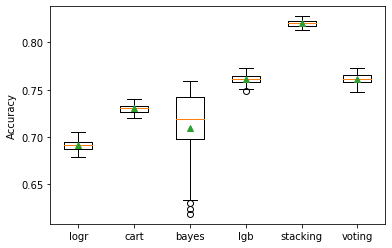

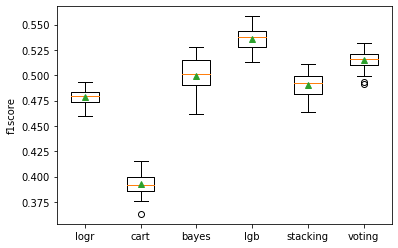

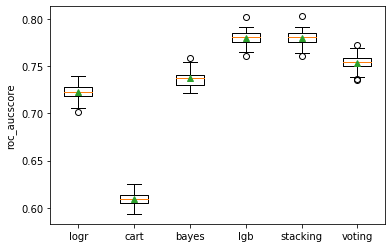

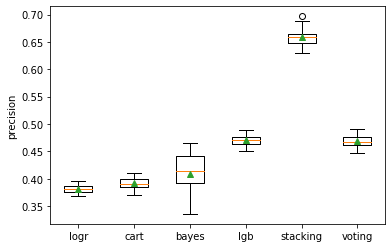

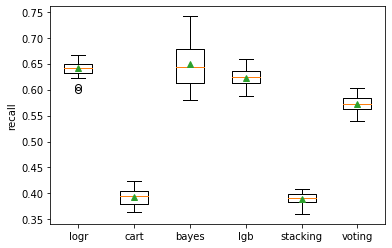

,Score Type,Model Name,Mean,STD
0,Accuracy,logr,0.691023,0.006311
1,f1scores,logr,0.478522,0.007260
2,roc_aucscores,logr,0.722658,0.007692
3,precision,logr,0.381939,0.006750
4,recall,logr,0.640709,0.013409
5,Accuracy,cart,0.730189,0.004939
6,f1scores,cart,0.392920,0.010770
7,roc_aucscores,cart,0.609611,0.006971
8,precision,cart,0.391610,0.010564
9,recall,cart,0.392836,0.014824


In [24]:
XNew = df2.iloc[:,1:]
Ynew = df2.iloc[:,0]

resultSummary2=compare(models,XNew,Ynew)
resultSummary2.to_excel("summary2.xlsx")  
resultSummary2


In [48]:
# Removing highly correlated variables (X13-X17) helped the naive bayes (the most), CART and logistics regression. 
# Overall, LighGBM performed best among others. Neither stacking nor viting ensemble method outperformed LightGBM in terms of performance indicators. 
# In addition, LightGBM is very fast compared to the ensamble methods. 

#Final Model
clf = lgb.LGBMClassifier(class_weight='balanced',objective='binary',scoringmetric='recall')
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, scoringmetric='recall', silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [49]:
#Training Performance

from sklearn.metrics import classification_report
print(classification_report(y_train, clf.predict(X_train)))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, clf.predict(X_train), average=None)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     18702
           1       0.54      0.74      0.63      5270

    accuracy                           0.81     23972
   macro avg       0.73      0.78      0.75     23972
weighted avg       0.84      0.81      0.81     23972



0.782231309115282

In [50]:
#Testing Performance
pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred, average=None)

              precision    recall  f1-score   support

           0       0.88      0.80      0.83      4633
           1       0.47      0.62      0.54      1360

    accuracy                           0.76      5993
   macro avg       0.67      0.71      0.68      5993
weighted avg       0.78      0.76      0.77      5993



0.7078766775434542

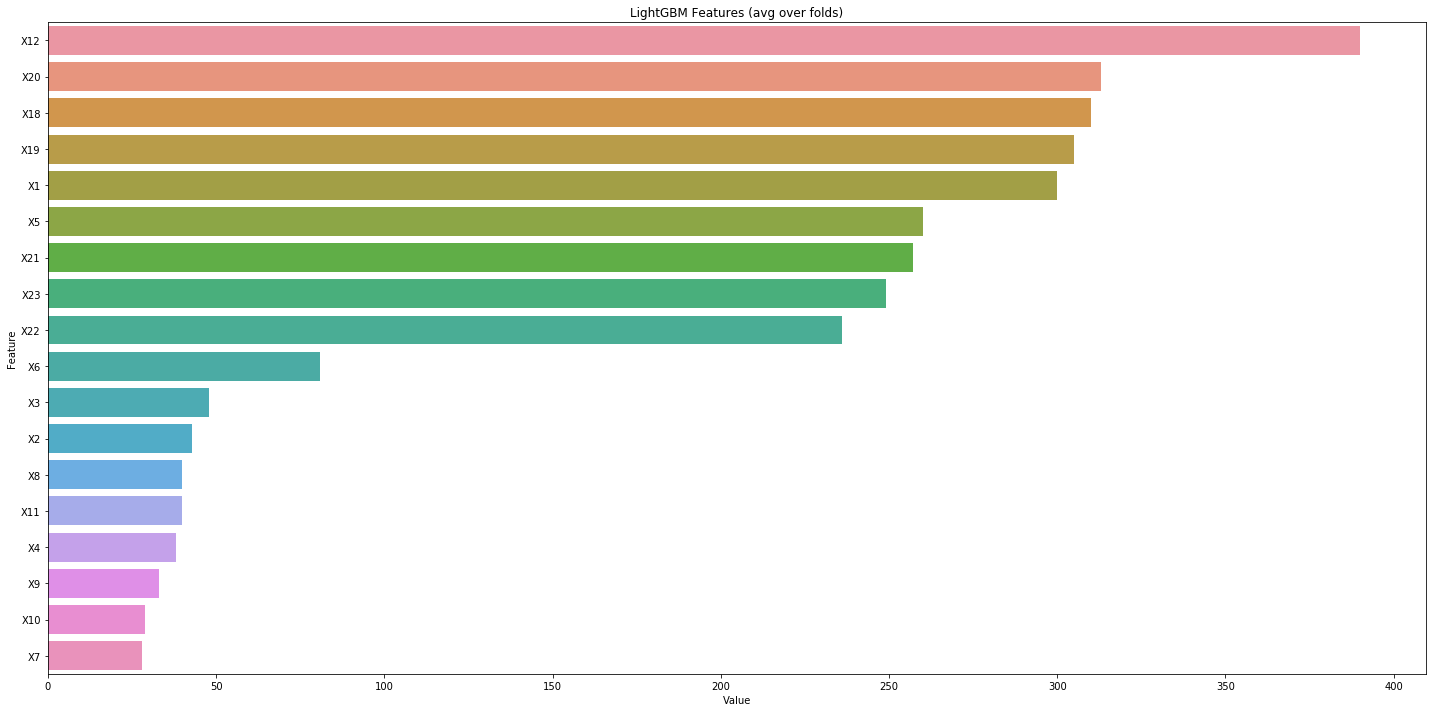

<Figure size 432x288 with 0 Axes>

In [51]:
# Feature Importance

import matplotlib.pyplot as plt

import warnings

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_test.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')


In [ ]:
# Top 6 important variables in impacting the default prediction (descinging order)

# X12 = Amount of bill statement in September, 2005
# X20 = Amount paid in July, 2005
# X18 = Amount paid in September, 2005
# X19 = Amount paid in August, 2005
# X1 = Amount of the given credit (NT dollar):
# X5 = Age